In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [67]:
img = cv2.resize(cv2.imread('lanes.png'), (cv2.imread('lanes.png').shape[1] // 2, cv2.imread('lanes.png').shape[0] // 2))

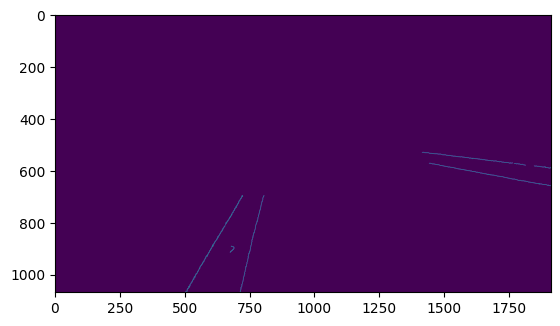

In [68]:
poolimg = img.copy()
grayPool = cv2.cvtColor(poolimg, cv2.COLOR_BGR2GRAY)
poolEdges = cv2.Canny(grayPool, 30, 100, apertureSize=3)
plt.imshow(poolEdges)


0.12260536398467432
-1.6702702702702703
0.19313304721030042
-4.320754716981132
-1.6644295302013423


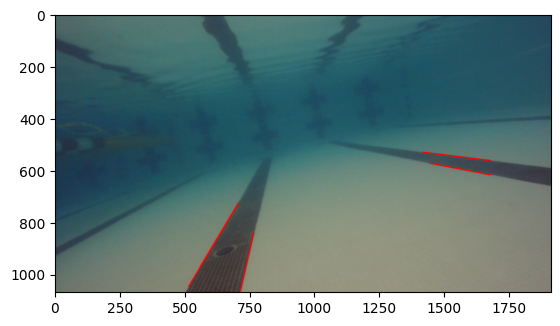

In [69]:
poolLines = np.copy(poolEdges)
poolLineys = cv2.HoughLinesP(
                poolLines, 
                1,
                np.pi/180,
                100,
                minLineLength = 220,
                maxLineGap = 13
        )

for poolline in poolLineys:
    x1, y1, x2, y2 = poolline[0]
    cv2.line(poolimg, (x1, y1),(x2, y2), (0, 0, 255), 3)
    print( (y1 - y2) / (x1 - x2))
plt.imshow(cv2.cvtColor(poolimg, cv2.COLOR_BGR2RGB))


In [70]:
def addLines(poolimg):
    grayPool = cv2.cvtColor(poolimg, cv2.COLOR_BGR2GRAY)
    poolEdges = cv2.Canny(grayPool, 295, 308, apertureSize=5)

    poolLines = cv2.HoughLinesP(
                poolEdges, 
                1,
                np.pi/180,
                255,
                minLineLength = 300,
                maxLineGap = 20
        )
    slope = [] 

    for poolline in poolLines:
        x1, y1, x2, y2 = poolline[0]
        cv2.line(poolimg, (x1, y1),(x2, y2), (0, 0, 255), 3)
        slope.append((x1 - x2) / (y1 - y2))
    # plt.imshow(poolimg)
    return slope
    




In [71]:
cap = cv2.VideoCapture('AUV_Vid.mkv')
ret, frame = cap.read()
addLines(frame)

[2.36144578313253, 2.7372262773722627]

In [72]:
ret, frame = cap.read()
addLines(frame)

[2.3612565445026177, 2.725663716814159]

In [73]:
# # i = 1
# while True:
#     ret, frame = cap.read()
#     try:
#         addLines(frame)
#     except:
#         print("No lines found!")
#     # i += 1
#     # if i >= 10: break

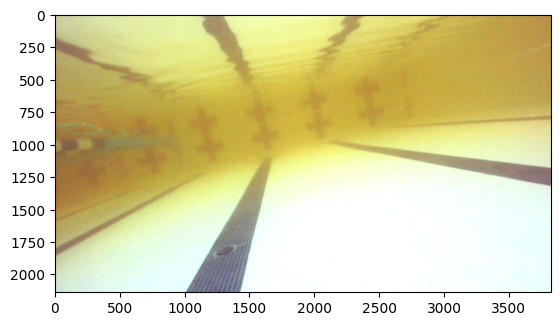

In [74]:
test = cv2.imread('lanes.png')
adjustedTest = cv2.addWeighted(test, 2, test, 0, 0)
plt.imshow(adjustedTest)
